# Python and Json Weather API Analysis

# Objective: Using Python, request weather analysis for 500 random cities and analyze the relationship between latitude and humidity, cloudiness, temperature, and wind speed.

# Analysis summary conclusions

#In general, as latitude (degrees) decreased, temperature (degrees F) increased. At around 0-20 degrees latitude, the temperature spiked in increase before slightly decreasing as latitude approached 0.

#We can not conclude from this random sample that there is a direct relationship between latitude (degrees) vs. humidity or latitude (degrees) vs. wind speed. The majority of cities had a wind speed less than 10 mph and there was a noticable cluster of cities with humidity greater than 80%.

#Latitude (degrees) vs. cloudiness (%) did not show a prominent relationship but a lot of cities are at the 0%, 20%, and 80-100% cloudiness points. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random 
import logging

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(147) 
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Use this to check the distribution - how random is the sample?
#See plots in proceeding steps

latlong = pd.DataFrame({
    "latitude": lats,
    "longitude": lngs
})
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
#Create cities dataframe
cities_df = pd.DataFrame(cities, columns=['City'])

cities_df.head()

,City
0,filadelfia
1,cedral
2,hobart
3,ribeira grande
4,aklavik


In [4]:
# set up additional columns to hold information in the desired dataframe
cities_df['Date'] = ""
cities_df['Country']= ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature'] = ""
cities_df['Humidity'] = ""
cities_df['Wind Speed'] = ""
cities_df['Cloudiness'] = ""

cities_df.head()

,City,Date,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,filadelfia,,,,,,,,
1,cedral,,,,,,,,
2,hobart,,,,,,,,
3,ribeira grande,,,,,,,,
4,aklavik,,,,,,,,


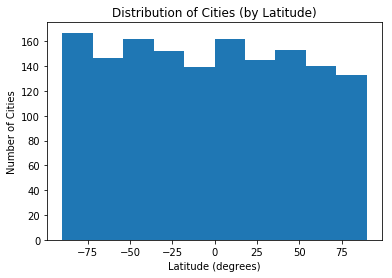

In [5]:
#Remember the random lat and longs? - Check for randomness
plt.hist(latlong['latitude'])
plt.xlabel("Latitude (degrees)")
plt.ylabel("Number of Cities")
plt.title("Distribution of Cities (by Latitude)")

plt.show()

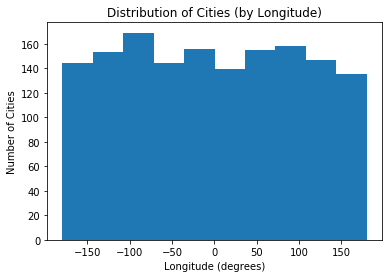

In [6]:
#Continued...
plt.hist(latlong['longitude'])

plt.xlabel("Longitude (degrees)")
plt.ylabel("Number of Cities")
plt.title("Distribution of Cities (by Longitude)")
plt.show()

#Both histograms are not perfect, but there is no skewing which means that we can go ahead with our random sample of coordinates

In [7]:
# Build partial query URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?"


In [8]:
import pprint

In [9]:
print(f"Beginning Data Retrieval")
print("-------------------------")


for index, row in cities_df.iterrows():
    query_url = f"{base_url}q={row['City']}&AppID={api_key}" 

    
    response = requests.get(query_url).json()
    Citytype = row['City']

    
    print(f"Processing Record {index}: {Citytype}")    
    

    
    #pprint.pprint(response)
    try:
        row['Latitude'] = response['coord']['lat']
        row['Longitude'] = response['coord']['lon'] 
        row['Date'] = response['sys']['sunrise']
        row['Country'] = response['sys']['country']
        row['Temperature'] = response['main']['temp']
        row['Humidity'] = response['main']['humidity']
        row['Wind Speed'] = response['wind']['speed']
        row['Cloudiness'] = response['clouds']['all']
        
    except (KeyError):
        print



Beginning Data Retrieval
-------------------------
Processing Record 0: filadelfia
Processing Record 1: cedral
Processing Record 2: hobart
Processing Record 3: ribeira grande
Processing Record 4: aklavik
Processing Record 5: lavrentiya
Processing Record 6: palabuhanratu
Processing Record 7: punta arenas
Processing Record 8: sucua
Processing Record 9: kracheh
Processing Record 10: cabo san lucas
Processing Record 11: linxia
Processing Record 12: east london
Processing Record 13: barrow
Processing Record 14: ushuaia
Processing Record 15: sibolga
Processing Record 16: lagoa
Processing Record 17: lebu
Processing Record 18: chuy
Processing Record 19: saint-philippe
Processing Record 20: souillac
Processing Record 21: springbok
Processing Record 22: kieta
Processing Record 23: tuktoyaktuk
Processing Record 24: mys shmidta
Processing Record 25: cidreira
Processing Record 26: rikitea
Processing Record 27: bluff
Processing Record 28: hermanus
Processing Record 29: taolanaro
Processing Record 30

Processing Record 253: saravan
Processing Record 254: macklin
Processing Record 255: wyndham
Processing Record 256: matipo
Processing Record 257: ponta do sol
Processing Record 258: marystown
Processing Record 259: evensk
Processing Record 260: bredasdorp
Processing Record 261: buala
Processing Record 262: kruisfontein
Processing Record 263: saldanha
Processing Record 264: tsihombe
Processing Record 265: illoqqortoormiut
Processing Record 266: vereya
Processing Record 267: isangel
Processing Record 268: umm durman
Processing Record 269: conde
Processing Record 270: bethel
Processing Record 271: gap
Processing Record 272: tikrit
Processing Record 273: tawang
Processing Record 274: elizabeth city
Processing Record 275: scottsbluff
Processing Record 276: floro
Processing Record 277: utiroa
Processing Record 278: krasnoselkup
Processing Record 279: brownwood
Processing Record 280: hovd
Processing Record 281: afyonkarahisar
Processing Record 282: hami
Processing Record 283: abong mbang
Proc

Processing Record 504: grand gaube
Processing Record 505: henties bay
Processing Record 506: okha
Processing Record 507: vao
Processing Record 508: nemuro
Processing Record 509: jahanabad
Processing Record 510: bonao
Processing Record 511: itoman
Processing Record 512: mersing
Processing Record 513: sao miguel do araguaia
Processing Record 514: meulaboh
Processing Record 515: akureyri
Processing Record 516: katsina
Processing Record 517: toropets
Processing Record 518: kavieng
Processing Record 519: opuwo
Processing Record 520: bilma
Processing Record 521: dalbandin
Processing Record 522: lukang
Processing Record 523: comodoro rivadavia
Processing Record 524: barcelos
Processing Record 525: chhagalnaiya
Processing Record 526: el tarra
Processing Record 527: mayo
Processing Record 528: roald
Processing Record 529: shelburne
Processing Record 530: inhambane
Processing Record 531: aflu
Processing Record 532: flinders
Processing Record 533: talcahuano
Processing Record 534: senekal
Process

In [10]:
cities_df.replace('', np.nan, inplace=True)
cities_df.dropna(how='any',inplace=True)

In [11]:
cities_df.head()

,City,Date,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,filadelfia,1.547631e+09,PY,-22.35,-60.04,301.55,63.0,4.77,0.0
1,cedral,1.547645e+09,MX,23.82,-100.72,278.35,93.0,1.47,36.0
2,hobart,1.547578e+09,AU,-42.88,147.33,292.15,55.0,3.60,75.0
3,ribeira grande,1.547630e+09,PT,38.52,-28.70,287.15,87.0,2.10,40.0
4,aklavik,1.547667e+09,CA,68.22,-135.01,246.15,68.0,4.60,5.0


In [12]:
#cities_df.to_csv('citydata.csv')

In [13]:
#Convert temperature to F
#(df['a'] * 2 - df['b']).to_frame('col')
cities_df['Temperature']= (cities_df['Temperature'] -273.15)
cities_df['Temperature']= (cities_df['Temperature'] * (9/5))
cities_df['Temperature']= (cities_df['Temperature'] + 32)


In [14]:
cities_df.head()

,City,Date,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,filadelfia,1.547631e+09,PY,-22.35,-60.04,83.12,63.0,4.77,0.0
1,cedral,1.547645e+09,MX,23.82,-100.72,41.36,93.0,1.47,36.0
2,hobart,1.547578e+09,AU,-42.88,147.33,66.20,55.0,3.60,75.0
3,ribeira grande,1.547630e+09,PT,38.52,-28.70,57.20,87.0,2.10,40.0
4,aklavik,1.547667e+09,CA,68.22,-135.01,-16.60,68.0,4.60,5.0


In [15]:
#Convert Wind Speed meters/hour to mph
cities_df['Wind Speed']= (cities_df['Wind Speed']*2.23694)

In [16]:
cities_df.head()

,City,Date,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,filadelfia,1.547631e+09,PY,-22.35,-60.04,83.12,63.0,10.670204,0.0
1,cedral,1.547645e+09,MX,23.82,-100.72,41.36,93.0,3.288302,36.0
2,hobart,1.547578e+09,AU,-42.88,147.33,66.20,55.0,8.052984,75.0
3,ribeira grande,1.547630e+09,PT,38.52,-28.70,57.20,87.0,4.697574,40.0
4,aklavik,1.547667e+09,CA,68.22,-135.01,-16.60,68.0,10.289924,5.0


In [17]:
#Run dependencies again just in case

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

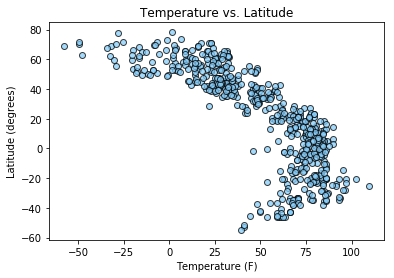

In [18]:
x_axis1 = cities_df['Temperature']
y_axis1 = cities_df['Latitude']

plt.scatter(x_axis1, y_axis1, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude (degrees)")
plt.title("Temperature vs. Latitude")
# Save Figure
plt.savefig("TempLat.png")
plt.show()

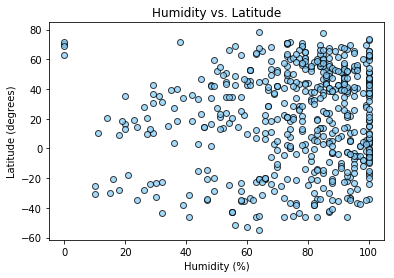

In [19]:
x_axis2 = cities_df['Humidity']
y_axis2 = cities_df['Latitude']

plt.scatter(x_axis2, y_axis2, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Humidity vs. Latitude")
# Save Figure
plt.savefig("HumLat.png")
plt.show()

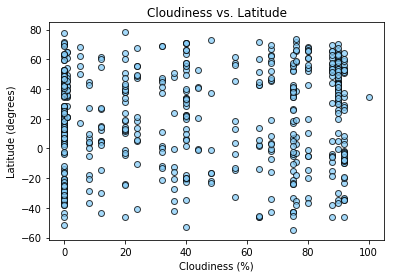

In [20]:
x_axis3 = cities_df['Cloudiness']
y_axis3 = cities_df['Latitude']

plt.scatter(x_axis3, y_axis3, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Cloudiness vs. Latitude")
# Save Figure
plt.savefig("CloudLat.png")
plt.show()

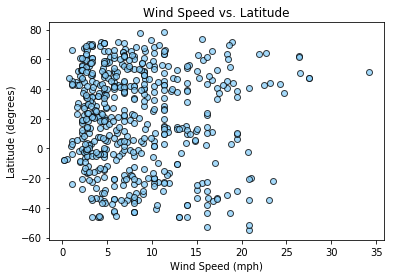

In [21]:
x_axis4 = cities_df['Wind Speed']
y_axis4 = cities_df['Latitude']

plt.scatter(x_axis4, y_axis4, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude (degrees)")
plt.title("Wind Speed vs. Latitude")
# Save Figure
plt.savefig("WindLat.png")
plt.show()

In [22]:
cities_df.to_csv('citydata.csv')